## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import statsmodels.api as sm


## Reading Dataset

In [ ]:
data=pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#checking null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
#checking count of features and observations
data.shape

(730, 16)

In [ ]:
#changing dtype of datetime column to datetime
data.dteday=pd.to_datetime(data.dteday)
#additional information on dataset
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualising Dataset

In [ ]:
#Visualising dataset: relation between features
#sns.pairplot(data)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

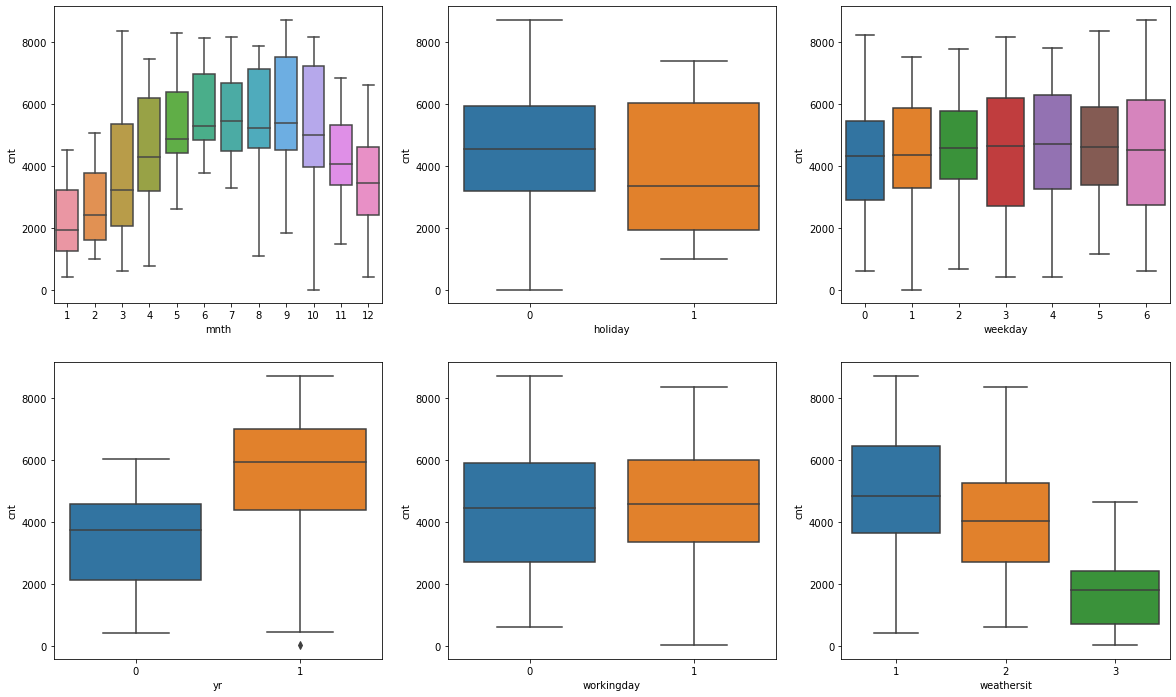

In [ ]:
#Visualising dataset: categorical features
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x="mnth",y="cnt",data=data)
plt.subplot(2,3,2)
sns.boxplot(x="holiday",y="cnt",data=data)
plt.subplot(2,3,3)
sns.boxplot(x="weekday",y="cnt",data=data)
plt.subplot(2,3,4)
sns.boxplot(x="yr",y="cnt",data=data)
plt.subplot(2,3,5)
sns.boxplot(x="workingday",y="cnt",data=data)
plt.subplot(2,3,6)
sns.boxplot(x="weathersit",y="cnt",data=data)

## Preparing data for Modelling

In [ ]:
#yes/no variables are already mapped as binary
#dealing with other categorical variables by creating dummy variables


In [ ]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
#Categorising features in dummy,binary and contineous types
varlistBinary=["workingday","holiday","yr"]
varlistDummy=["weathersit","weekday","mnth","season"]
varlistContineous=["instant","dteday","temp","atemp","hum","windspeed","casual","registered","cnt"]

In [ ]:
#Creating dummy (k-1) variables for k levels in categorical feature(ideally)
dummy=pd.get_dummies(data["weekday"],drop_first=True,prefix="weekday")
dummy1=pd.get_dummies(data["weathersit"],drop_first=True,prefix="weathersit")
dummy2=pd.get_dummies(data["season"],drop_first=True,prefix="season")
dummy3=pd.get_dummies(data["mnth"],drop_first=True,prefix="month")

In [ ]:
#Creating dummy (k) variables for k levels in categorical feature(i dont understand in the process when this subtracted feature will be included so taking all)
dummy=pd.get_dummies(data["weekday"],prefix="weekday")
dummy1=pd.get_dummies(data["weathersit"],prefix="weathersit")
dummy2=pd.get_dummies(data["season"],prefix="season")
dummy3=pd.get_dummies(data["mnth"],prefix="month")

In [ ]:
#Combining all dummy variable to be merged finally with main dataset in next step
dummyColumns=pd.concat([dummy,dummy1,dummy2,dummy3],axis=1)

In [ ]:
#Creating a dataframe with dummy variables and droping the original categorical columns:Original columns exist in "data"
data1=pd.concat([data,dummyColumns],axis=1)
data1=data1.drop(["weathersit","weekday","mnth","season"],axis=1)
data1.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,0,0,0
1,2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,0,0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#dropping index and date column as all its information is available in other features
data=data.drop(["instant","dteday"],axis=1)
data1=data1.drop(["instant","dteday"],axis=1)

## Splitting data in train and test and rescaling

In [ ]:
#importing library for train_test split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#data split ration taken as 70:30
data1_train,data1_test=train_test_split(data1,train_size=0.7, random_state=100)
data_train,data_test=train_test_split(data,train_size=0.7, random_state=100)

In [ ]:
print(data1_train.shape)
print(data1_test.shape)

(510, 36)
(220, 36)


In [ ]:
#Scaling/normalising 7 contineous variables
scaler=MinMaxScaler()
data1_train.loc[:,["temp","atemp","hum","windspeed","casual","registered","cnt"]]=scaler.fit_transform(data1_train.loc[:,["temp","atemp","hum","windspeed","casual","registered","cnt"]])

/home/boeka/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [ ]:
#visualising data normalised
data1_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,...,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,...,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualising data:heatmap

<AxesSubplot:>

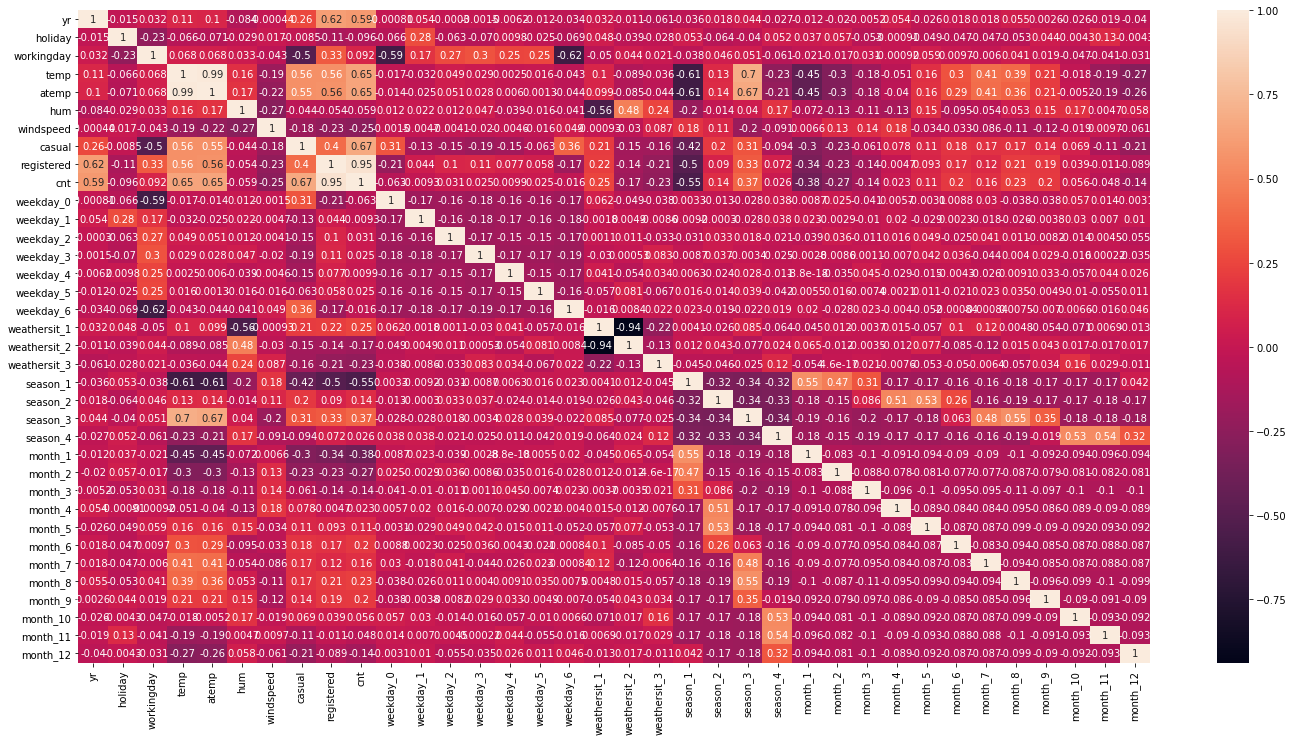

In [ ]:
#heatmap of all features
plt.figure(figsize=(24,12))
sns.heatmap(data1_train.corr(),annot=True)

In [ ]:
#creating x and y variables as y_train and X_train
y_train=data1_train.pop("cnt")
X_train=data1_train

In [ ]:
#adding constant and fitting data with one feature "registered" 
X_train_lm = sm.add_constant(X_train[['registered']])
lr = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
lr.params

const         0.024369
registered    0.933845
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4536.
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.26e-255
Time:                        23:18:41   Log-Likelihood:                 624.25
No. Observations:                 510   AIC:                            -1244.
Df Residuals:                     508   BIC:                            -1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0244      0.008      3.077      0.002       0.009       0.040
registered     0.9338      0.014     67.350      0.000       0.907       0.961
==============================================================================
Omnibus:                      134.334   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.249
Skew:                           1.510   Prob(JB):                     3.74e-56
Kurtosis:                       4.699   Cond. No.                         5.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#adding casual and registered gives r-squared as 1,because they sum up to make "cnt" adding any other has no effect
X_train_lm = sm.add_constant(X_train[['registered',"casual","temp",]])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.065e+32
Date:                Wed, 01 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:18:41   Log-Likelihood:                 17806.
No. Observations:                 510   AIC:                        -3.560e+04
Df Residuals:                     506   BIC:                        -3.559e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.556e-17   2.11e-17     -1.689      0.092   -7.69e-17     5.8e-18
registered     0.7968   3.95e-17   2.02e+16      0.000       0.797       0.797
casual         0.3775   4.36e-17   8.66e+15      0.000       0.377       0.377
temp        4.137e-16   4.39e-17      9.418      0.000    3.27e-16       5e-16
==============================================================================
Omnibus:                       10.680   Durbin-Watson:                   0.672
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.685
Skew:                          -0.182   Prob(JB):                       0.0214
Kurtosis:                       2.522   Cond. No.                         9.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#So we will make model without using these two together and will test them in the end 
X_train_lm = sm.add_constant(X_train[["registered","temp"]])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2856.
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.04e-276
Time:                        23:18:41   Log-Likelihood:                 678.13
No. Observations:                 510   AIC:                            -1350.
Df Residuals:                     507   BIC:                            -1338.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0167      0.008     -2.067      0.039      -0.033      -0.001
registered     0.8419      0.015     55.894      0.000       0.812       0.871
temp           0.1660      0.015     10.922      0.000       0.136       0.196
==============================================================================
Omnibus:                      147.870   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.976
Skew:                           1.563   Prob(JB):                     1.48e-69
Kurtosis:                       5.268   Cond. No.                         8.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Making model by adding top features as shown in heatmap namely temp and yr
X_train_lm = sm.add_constant(X_train[["temp","yr"]])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          3.34e-130
Time:                        23:18:41   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#adding more variables with corr coeff higher then others: season1
X_train_lm = sm.add_constant(X_train[["temp","yr","season_1"]])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     477.7
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          3.81e-147
Time:                        23:18:41   Log-Likelihood:                 381.47
No. Observations:                 510   AIC:                            -754.9
Df Residuals:                     506   BIC:                            -738.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2016      0.019     10.769      0.000       0.165       0.238
temp           0.4181      0.029     14.646      0.000       0.362       0.474
yr             0.2404      0.010     23.448      0.000       0.220       0.261
season_1      -0.1434      0.015     -9.601      0.000      -0.173      -0.114
==============================================================================
Omnibus:                      103.017   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.850
Skew:                          -0.985   Prob(JB):                     1.70e-61
Kurtosis:                       6.047   Cond. No.                         8.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#adding season3 in previous model to create a new model
X_train_lm = sm.add_constant(X_train[["temp","yr","season_3","season_1"]])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     362.8
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.91e-147
Time:                        23:18:42   Log-Likelihood:                 384.23
No. Observations:                 510   AIC:                            -758.5
Df Residuals:                     505   BIC:                            -737.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1797      0.021      8.615      0.000       0.139       0.221
temp           0.4763      0.038     12.621      0.000       0.402       0.550
yr             0.2392      0.010     23.406      0.000       0.219       0.259
season_3      -0.0381      0.016     -2.344      0.019      -0.070      -0.006
season_1      -0.1381      0.015     -9.184      0.000      -0.168      -0.109
==============================================================================
Omnibus:                      107.015   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.391
Skew:                          -1.012   Prob(JB):                     9.73e-66
Kurtosis:                       6.161   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#adding "weathersit_1" in previous model to create a new model
X_train_lm = sm.add_constant(X_train[["temp","yr","season_3","season_1","weathersit_1"]])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     352.7
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          5.35e-162
Time:                        23:18:42   Log-Likelihood:                 422.39
No. Observations:                 510   AIC:                            -832.8
Df Residuals:                     504   BIC:                            -807.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1432      0.020      7.239      0.000       0.104       0.182
temp             0.4477      0.035     12.722      0.000       0.379       0.517
yr               0.2375      0.009     25.022      0.000       0.219       0.256
season_3        -0.0394      0.015     -2.606      0.009      -0.069      -0.010
season_1        -0.1481      0.014    -10.571      0.000      -0.176      -0.121
weathersit_1     0.0885      0.010      9.021      0.000       0.069       0.108
==============================================================================
Omnibus:                       95.504   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.145
Skew:                          -0.858   Prob(JB):                     2.02e-67
Kurtosis:                       6.393   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#adding "windspeed" in previous model to create a new model
X_train_lm = sm.add_constant(X_train[["temp","yr","season_3","season_1","weathersit_1","windspeed"]])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     327.5
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          3.77e-170
Time:                        23:18:42   Log-Likelihood:                 444.50
No. Observations:                 510   AIC:                            -875.0
Df Residuals:                     503   BIC:                            -845.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2032      0.021      9.701      0.000       0.162       0.244
temp             0.4458      0.034     13.216      0.000       0.380       0.512
yr               0.2383      0.009     26.182      0.000       0.220       0.256
season_3        -0.0497      0.015     -3.414      0.001      -0.078      -0.021
season_1        -0.1392      0.013    -10.309      0.000      -0.166      -0.113
weathersit_1     0.0893      0.009      9.492      0.000       0.071       0.108
windspeed       -0.1845      0.027     -6.749      0.000      -0.238      -0.131
==============================================================================
Omnibus:                       83.425   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.316
Skew:                          -0.781   Prob(JB):                     3.97e-53
Kurtosis:                       5.986   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#adding "month_9" in previous model to create a new model
X_train_lm = sm.add_constant(X_train[["temp","yr","season_3","season_1","weathersit_1","windspeed","month_9"]])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     297.2
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          4.98e-174
Time:                        23:19:09   Log-Likelihood:                 456.59
No. Observations:                 510   AIC:                            -897.2
Df Residuals:                     502   BIC:                            -863.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1879      0.021      9.076      0.000       0.147       0.229
temp             0.4609      0.033     13.918      0.000       0.396       0.526
yr               0.2383      0.009     26.790      0.000       0.221       0.256
season_3        -0.0715      0.015     -4.800      0.000      -0.101      -0.042
season_1        -0.1332      0.013    -10.056      0.000      -0.159      -0.107
weathersit_1     0.0929      0.009     10.068      0.000       0.075       0.111
windspeed       -0.1776      0.027     -6.636      0.000      -0.230      -0.125
month_9          0.0864      0.017      4.937      0.000       0.052       0.121
==============================================================================
Omnibus:                       93.936   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              267.615
Skew:                          -0.884   Prob(JB):                     7.73e-59
Kurtosis:                       6.077   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#adding "month_1" and "weathersit_2" in previous model to create a new model
X_train_lm = sm.add_constant(X_train[["temp","yr","season_3","season_1","weathersit_1","windspeed","month_9","month_1","weathersit_3"]])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.4
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          4.10e-185
Time:                        23:19:09   Log-Likelihood:                 488.53
No. Observations:                 510   AIC:                            -957.1
Df Residuals:                     500   BIC:                            -914.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2173      0.020     10.743      0.000       0.178       0.257
temp             0.4325      0.032     13.484      0.000       0.370       0.496
yr               0.2357      0.008     28.092      0.000       0.219       0.252
season_3        -0.0648      0.014     -4.568      0.000      -0.093      -0.037
season_1        -0.1278      0.013     -9.473      0.000      -0.154      -0.101
weathersit_1     0.0768      0.009      8.630      0.000       0.059       0.094
windspeed       -0.1655      0.025     -6.497      0.000      -0.216      -0.115
month_9          0.0882      0.016      5.350      0.000       0.056       0.121
month_1         -0.0451      0.018     -2.480      0.013      -0.081      -0.009
weathersit_3    -0.2011      0.025     -7.895      0.000      -0.251      -0.151
==============================================================================
Omnibus:                       68.274   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.817
Skew:                          -0.719   Prob(JB):                     2.41e-34
Kurtosis:                       5.285   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Model1 final
#adding "holiday"and "hum" features in previous model to create new model
X_train_lm = sm.add_constant(X_train[["temp","yr","season_3","season_1","weathersit_1","windspeed","month_9",
                                      "weathersit_3",]])
model1features=["temp","yr","season_3","season_1","weathersit_1","windspeed","month_9",
                                "weathersit_3","const"]
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     298.1
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          4.83e-185
Time:                        23:19:10   Log-Likelihood:                 485.42
No. Observations:                 510   AIC:                            -952.8
Df Residuals:                     501   BIC:                            -914.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2050      0.020     10.401      0.000       0.166       0.244
temp             0.4511      0.031     14.386      0.000       0.389       0.513
yr               0.2349      0.008     27.877      0.000       0.218       0.251
season_3        -0.0699      0.014     -4.959      0.000      -0.098      -0.042
season_1        -0.1404      0.013    -11.173      0.000      -0.165      -0.116
weathersit_1     0.0779      0.009      8.716      0.000       0.060       0.095
windspeed       -0.1583      0.025     -6.222      0.000      -0.208      -0.108
month_9          0.0895      0.017      5.404      0.000       0.057       0.122
weathersit_3    -0.1980      0.026     -7.743      0.000      -0.248      -0.148
==============================================================================
Omnibus:                       66.024   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.455
Skew:                          -0.699   Prob(JB):                     5.80e-33
Kurtosis:                       5.243   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#adding "registered" features in previous model to create new model and compare it with one withouth "registered" feature 
X_train_lm2 = sm.add_constant(X_train[["temp","yr","season_3","season_1","weathersit_1","windspeed","month_9","month_1",
                                      "month_8","weathersit_3","holiday","hum","registered"]])
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     564.0
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.78e-287
Time:                        23:19:10   Log-Likelihood:                 742.41
No. Observations:                 510   AIC:                            -1457.
Df Residuals:                     496   BIC:                            -1398.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0956      0.023      4.135      0.000       0.050       0.141
temp             0.2420      0.022     11.240      0.000       0.200       0.284
yr               0.0696      0.008      8.913      0.000       0.054       0.085
season_3        -0.0475      0.010     -4.589      0.000      -0.068      -0.027
season_1        -0.0441      0.009     -5.002      0.000      -0.061      -0.027
weathersit_1     0.0228      0.007      3.397      0.001       0.010       0.036
windspeed       -0.0775      0.017     -4.593      0.000      -0.111      -0.044
month_9          0.0428      0.011      3.789      0.000       0.021       0.065
month_1         -0.0130      0.011     -1.167      0.244      -0.035       0.009
month_8          0.0172      0.011      1.536      0.125      -0.005       0.039
weathersit_3    -0.0677      0.016     -4.132      0.000      -0.100      -0.036
holiday         -0.0102      0.016     -0.618      0.537      -0.042       0.022
hum             -0.0745      0.024     -3.123      0.002      -0.121      -0.028
registered       0.6358      0.023     27.528      0.000       0.590       0.681
==============================================================================
Omnibus:                      128.304   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.207
Skew:                           1.297   Prob(JB):                     2.90e-65
Kurtosis:                       5.694   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#model2 with registered feature optimised
#removing holiday and month_1 features in previous model to create new model and compare it with one withouth "registered" feature 
X_train_lm2 = sm.add_constant(X_train[["temp","yr","season_3","weathersit_1","windspeed","month_9",
                                      "weathersit_3","hum","registered"]])
lr2 = sm.OLS(y_train, X_train_lm2).fit()
model2features=["temp","yr","season_3","weathersit_1","windspeed","month_9",
                                      "weathersit_3","hum","registered","const"]
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     762.3
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.74e-285
Time:                        23:19:10   Log-Likelihood:                 724.69
No. Observations:                 510   AIC:                            -1429.
Df Residuals:                     500   BIC:                            -1387.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0339      0.021      1.595      0.111      -0.008       0.076
temp             0.2789      0.021     13.439      0.000       0.238       0.320
yr               0.0538      0.008      7.143      0.000       0.039       0.069
season_3        -0.0450      0.009     -4.990      0.000      -0.063      -0.027
weathersit_1     0.0187      0.007      2.722      0.007       0.005       0.032
windspeed       -0.0719      0.017     -4.168      0.000      -0.106      -0.038
month_9          0.0351      0.011      3.291      0.001       0.014       0.056
weathersit_3    -0.0525      0.017     -3.161      0.002      -0.085      -0.020
hum             -0.0611      0.024     -2.506      0.013      -0.109      -0.013
registered       0.6951      0.021     32.676      0.000       0.653       0.737
==============================================================================
Omnibus:                      121.282   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.357
Skew:                           1.311   Prob(JB):                     6.41e-53
Kurtosis:                       5.107   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#addding more variables adds no significant value to model hence calculating vif for final test before modelling
#checking vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#vif of second model with "registered" feature in it
vif = pd.DataFrame()
vif['Features'] = X_train_lm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm2.values, i) for i in range(X_train_lm2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,66.20
9,registered,3.44
1,temp,3.21
3,season_3,2.31
2,yr,2.07
8,hum,1.85
4,weathersit_1,1.62
5,windspeed,1.26
6,month_9,1.23
7,weathersit_3,1.15


/home/boeka/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

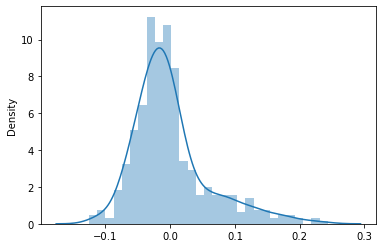

In [ ]:
#Residual plot for distribution and assumptions check
y_train_pred2=lr2.predict(X_train_lm2)
res2=y_train-y_train_pred2
sns.distplot(res2)

In [ ]:
#Scaling/normalising 7 contineous variables
data1_test.loc[:,["temp","atemp","hum","windspeed","casual","registered","cnt"]]=scaler.transform(data1_test.loc[:,["temp","atemp","hum","windspeed","casual","registered","cnt"]])
data1_test.head()

/home/boeka/.local/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y_test = data1_test.pop('cnt')
X_test = data1_test

In [ ]:
X_test_smtst=sm.add_constant(X_test)
X_test_smtst=X_test_smtst[model2features]
y_test_model2= lr2.predict(X_test_smtst)

In [ ]:
X_test_smts=sm.add_constant(X_test)
X_test_smts=X_test_smts[model1features]
y_test_model1= lr.predict(X_test_smts)

## Evaluating Result of Modelling [Two models]

Text(0, 0.5, 'y_test_model2')

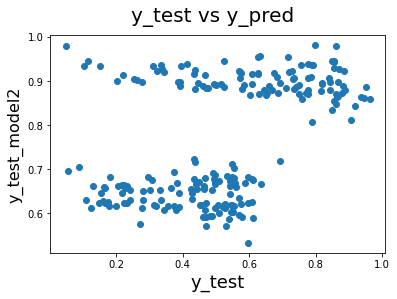

In [ ]:
# Plotting y_test and y_pred to understand the spread of model 2 (with feature "registered")

fig = plt.figure()
plt.scatter(y_test, y_test_model2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_model2', fontsize = 16) 

In [ ]:
#clearly model2 is not what we expected now visualising model1 

Text(0, 0.5, 'y_test_model1')

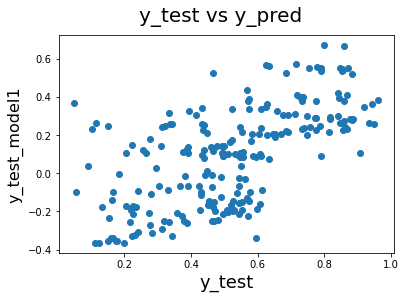

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_model1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_model1', fontsize = 16) 

In [ ]:
print(model2features)
print(model1features)

['temp', 'yr', 'season_3', 'weathersit_1', 'windspeed', 'month_9', 'weathersit_3', 'hum', 'registered', 'const']
['temp', 'yr', 'season_3', 'season_1', 'weathersit_1', 'windspeed', 'month_9', 'weathersit_3', 'const']


In [ ]:
#clearly registered and casual dont give results as expected while on the other hand model 1 gives better result
print(model1features)

['temp', 'yr', 'season_3', 'season_1', 'weathersit_1', 'windspeed', 'month_9', 'weathersit_3', 'const']


/home/boeka/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

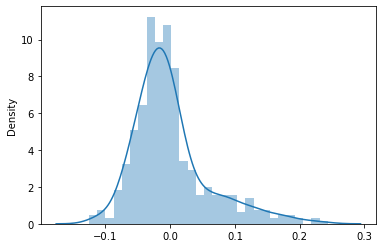

In [ ]:
#Residual of predicted values from model1
res=y_test-y_test_model1
sns.distplot(res2)

In [ ]:
# Importing RFE and LinearRegression for checking selected feature
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, 8)             # running RFE
rfe = rfe.fit(X_train, y_train)

/home/boeka/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 25),
 ('holiday', False, 2),
 ('workingday', False, 3),
 ('temp', False, 26),
 ('atemp', False, 28),
 ('hum', False, 27),
 ('windspeed', False, 24),
 ('casual', True, 1),
 ('registered', True, 1),
 ('weekday_0', True, 1),
 ('weekday_1', False, 7),
 ('weekday_2', False, 9),
 ('weekday_3', False, 8),
 ('weekday_4', False, 10),
 ('weekday_5', False, 11),
 ('weekday_6', True, 1),
 ('weathersit_1', False, 6),
 ('weathersit_2', False, 5),
 ('weathersit_3', False, 4),
 ('season_1', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('month_1', False, 20),
 ('month_2', False, 15),
 ('month_3', False, 21),
 ('month_4', False, 16),
 ('month_5', False, 22),
 ('month_6', False, 18),
 ('month_7', False, 19),
 ('month_8', False, 12),
 ('month_9', False, 14),
 ('month_10', False, 13),
 ('month_11', False, 17),
 ('month_12', False, 23)]

In [ ]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe=X_train_rfe.drop("casual",axis=1)

In [ ]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     2122.
Date:                Wed, 01 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:19:15   Log-Likelihood:                 872.78
No. Observations:                 510   AIC:                            -1732.
Df Residuals:                     503   BIC:                            -1702.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0205      0.005     -3.970      0.0

In [ ]:
X_test_sm=sm.add_constant(X_test)
rfe_y_pred=lm.predict(X_test_sm[X_train_rfe.columns])

Text(0, 0.5, 'rfe_y_pred')

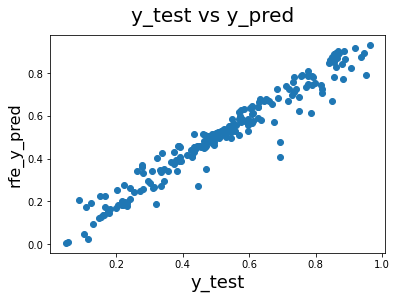

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, rfe_y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('rfe_y_pred', fontsize = 16) 

In [ ]:
#Model using RFE and eliminating some afterwards produces this result like casual to keep the significance of other features

/home/boeka/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

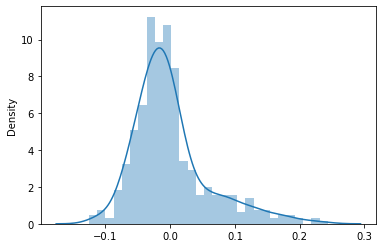

In [ ]:
#Residual of predicted values from model3 i.e RFE plus manual keeping it to 8 features
res=y_test-rfe_y_pred
sns.distplot(res2)

In [ ]:
from sklearn.metrics import r2_score
model1r2_score=r2_score(y_test, y_test_model1)
model1r2_score

-3.692654623207357

In [ ]:
modelRFEr2_score=r2_score(y_test, rfe_y_pred)
modelRFEr2_score

0.9426313051023153

## Rfe+manual selected mmodel explains 0.94 of what it explains 0.96 in training dataset